In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import decomposition

def plot_arrow(ax, start, stop):
    ax.annotate('', xytext=start, xy=stop,                 
                arrowprops=dict(facecolor='red', width=2.0))
    
def corr_vars( start=-10, stop=10, step=0.5, mu=0, sigma=3, func=lambda x: x ):
    x = np.arange(start, stop, step)    
    e = np.random.normal(mu, sigma, x.size)
    y = np.zeros(x.size)
    
    for ind in range(x.size):
        y[ind] = func(x[ind]) + e[ind]
    
    return (x,y)

In [20]:
np.random.seed(100)

(x1,x2) = corr_vars(start=2, stop=4, step=0.2, sigma=2, func=lambda x: 2*math.sin(x))

A = np.column_stack((x1,x2))

Aorig = A

A

array([[ 2.        , -1.68093609],
       [ 2.2       ,  2.30235361],
       [ 2.4       ,  3.65699797],
       [ 2.6       ,  0.52613067],
       [ 2.8       ,  2.63261787],
       [ 3.        ,  1.3106777 ],
       [ 3.2       ,  0.32561105],
       [ 3.4       , -2.65116887],
       [ 3.6       , -1.26403255],
       [ 3.8       , -0.71371289]])

(-4, 5)

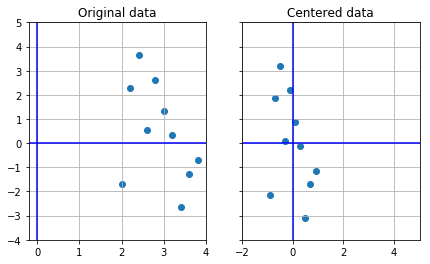

In [21]:
A = (A-np.mean(A,axis=0))

# Plot the original matrix
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(7,4))
ax1.scatter(Aorig[:,0], Aorig[:,1])
ax1.set_title("Original data")
ax1.grid(True)

# Plot the centered data
ax2.scatter(A[:,0],A[:,1])
ax2.set_title("Centered data")
ax2.grid(True)

ax1.axhline(0, color="blue")
ax1.axvline(0, color="blue")
ax2.axhline(0, color="blue")
ax2.axvline(0, color="blue")

plt.xlim([-2,5])
plt.ylim([-4,5])

In [22]:
S = np.dot(A.T,A)/(A.shape[0]-1)

print("The covariance matrix is:")
print(S,"\n")

The covariance matrix is:
[[ 0.36666667 -0.55248919]
 [-0.55248919  4.18798554]] 



Vector slope:  [-0.]


(-5, 5)

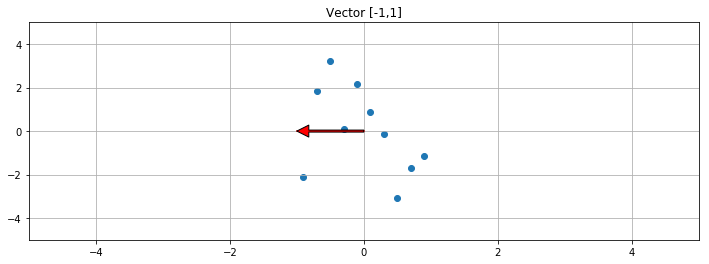

In [23]:
f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12,4))

V = np.array([[-1],[0]])
print("Vector slope: ",V[1]/V[0])
ax1.scatter(A[:,0],A[:,1])
ax1.set_title("Vector [-1,1]")
ax1.grid(True)
ax1.plot([0,V[0]],[0,V[1]],c='r')
plot_arrow(ax1, (0,0),(V[0],V[1]))
plt.xlim([-5,5])
plt.ylim([-5,5])

Vector slope:  [-1.50678871]


(-5, 5)

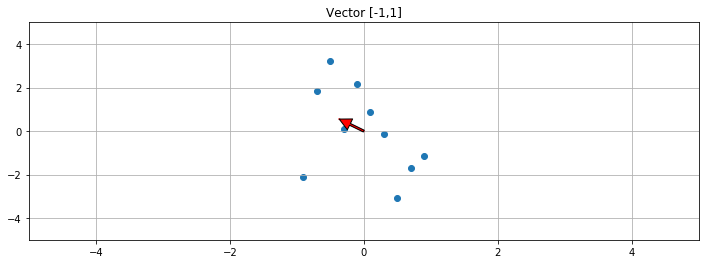

In [24]:
f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12,4))

V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
ax1.scatter(A[:,0],A[:,1])
ax1.set_title("Vector [-1,1]")
ax1.grid(True)
ax1.plot([0,V[0]],[0,V[1]],c='r')
plot_arrow(ax1, (0,0),(V[0],V[1]))

plt.xlim([-5,5])
plt.ylim([-5,5])

Vector slope:  [-5.72313052]


(-5, 5)

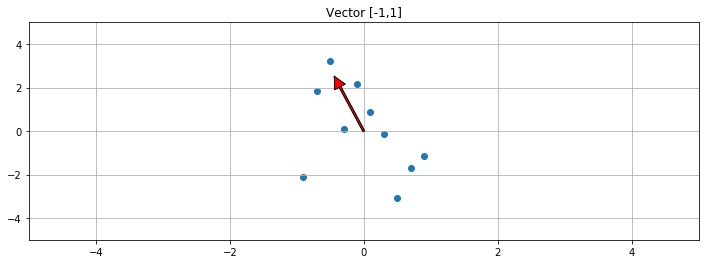

In [25]:
f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12,4))

V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
ax1.scatter(A[:,0],A[:,1])
ax1.set_title("Vector [-1,1]")
ax1.grid(True)
ax1.plot([0,V[0]],[0,V[1]],c='r')
plot_arrow(ax1, (0,0),(V[0],V[1]))

plt.xlim([-5,5])
plt.ylim([-5,5])

Vector slope:  [-6.94911232]


(-5, 5)

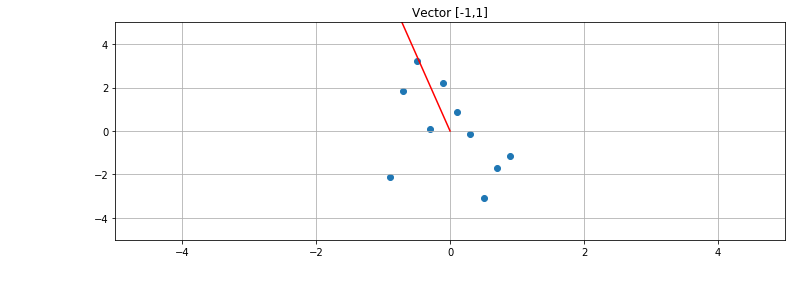

In [26]:
f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12,4))

V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
ax1.scatter(A[:,0],A[:,1])
ax1.set_title("Vector [-1,1]")
ax1.grid(True)
ax1.plot([0,V[0]],[0,V[1]],c='r')
plot_arrow(ax1, (0,0),(V[0],V[1]))

plt.xlim([-5,5])
plt.ylim([-5,5])

In [27]:
print("The slope of the vector converges to the direction of greatest variance:\n")

V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])

The slope of the vector converges to the direction of greatest variance:

Vector slope:  [-7.0507464]
Vector slope:  [-7.0577219]
Vector slope:  [-7.05819391]
Vector slope:  [-7.05822582]
Vector slope:  [-7.05822798]
Vector slope:  [-7.05822813]


In [28]:
# https://en.wikipedia.org/wiki/Eigenvalue_algorithm

l_1 = (S.trace() + np.sqrt(pow(S.trace(),2) - 4*np.linalg.det(S))) / 2
l_2 = (S.trace() - np.sqrt(pow(S.trace(),2) - 4*np.linalg.det(S))) / 2

print("The eigenvalues are:")
print("L1:",l_1)
print("L2:",l_2)

The eigenvalues are:
L1: 4.26626144724
L2: 0.288390761711


In [29]:
# Cayley-Hamilton theorem
# (A - λ1I )(A - λ2I ) = (A - λ2I )(A - λ1I ) = 0

A1 = S - l_1 * np.identity(2)
A2 = S - l_2 * np.identity(2)

E1 = A2[:,1]
E2 = A1[:,0]

E1 = E1 / np.linalg.norm(E1)
E2 = E2 / np.linalg.norm(E2)

print("The eigenvectors are:")
print("E1:", E1)
print("E2:", E2)

The eigenvectors are:
E1: [-0.14027773  0.9901122 ]
E2: [-0.9901122  -0.14027773]


In [30]:
E = np.column_stack((E1,E2))

E

array([[-0.14027773, -0.9901122 ],
       [ 0.9901122 , -0.14027773]])

In [31]:
evals, evecs = np.linalg.eigh(S)

print(evals)
print(evecs)

[ 0.28839076  4.26626145]
[[-0.9901122  -0.14027773]
 [-0.14027773  0.9901122 ]]


(-4, 5)

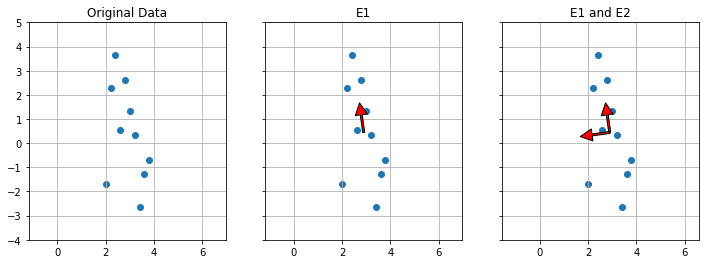

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,4))
ax1.scatter(Aorig[:,0],Aorig[:,1])
ax1.set_title("Original Data")
ax1.grid(True)
ax1.set_aspect('equal')

ax2.scatter(Aorig[:,0],Aorig[:,1])
ax2.set_title("E1")
ax2.grid(True)
plot_arrow(ax2, np.mean(Aorig,axis=0), np.mean(Aorig,axis=0) + np.dot(Aorig, E).std(axis=0).mean() * E1)
ax2.set_aspect('equal')               

ax3.scatter(Aorig[:,0],Aorig[:,1])
ax3.set_title("E1 and E2")
ax3.grid(True)
plot_arrow(ax3, np.mean(Aorig,axis=0), np.mean(Aorig,axis=0) + np.dot(Aorig, E).std(axis=0).mean() * E1)
plot_arrow(ax3, np.mean(Aorig,axis=0), np.mean(Aorig,axis=0) + np.dot(Aorig, E).std(axis=0).mean() * E2)
ax3.set_aspect('equal')               

plt.xlim([0,5])
plt.ylim([-4,5])

In [35]:
F1 = np.dot(A, E1)
F2 = np.dot(A, E2)

F = np.column_stack((F1, F2))
F

array([[-1.97812455,  1.18924584],
       [ 1.93772363,  0.43245658],
       [ 3.25091797,  0.04440771],
       [ 0.12295254,  0.28557622],
       [ 2.18055566, -0.20793946],
       [ 0.84363103, -0.22052313],
       [-0.15975102, -0.28036266],
       [-3.13515266, -0.06080918],
       [-1.78978762, -0.45341595],
       [-1.27296497, -0.72863598]])

In [36]:
pca = decomposition.PCA(n_components=2)
print(pca.fit_transform(A))

[[-1.97812455  1.18924584]
 [ 1.93772363  0.43245658]
 [ 3.25091797  0.04440771]
 [ 0.12295254  0.28557622]
 [ 2.18055566 -0.20793946]
 [ 0.84363103 -0.22052313]
 [-0.15975102 -0.28036266]
 [-3.13515266 -0.06080918]
 [-1.78978762 -0.45341595]
 [-1.27296497 -0.72863598]]
